<a href="https://colab.research.google.com/github/abhishekmali9191/Deep-Learning/blob/main/DL_DAY_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Layer Perceptron   19/11/2024**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
# Global Variable
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1
TEST_SIZE = 0.2
EPOCHS = 2000     # Same like Iterations

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 4),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)    # Updating our default plt dictionary with the above parameters in Main Environment.

CMAP = plt.cm.coolwarm         # Setting the colour

plt.style.use('seaborn-v0_8-darkgrid')


**Sklearn make_moons dataset**

In [ ]:
# Importing dataset from sklearn
X, y = datasets.make_moons(n_samples = N_SAMPLE,    # Number of data rows we want
                           noise = NOISE,           # Noise increases the scatter of the datapoints
                           random_state = RANDOM_STATE,
                           shuffle=True)

X.shape , y.shape     # Gives us numpy array

((1000, 2), (1000,))

**EDA**
1. Plot the data
2. Print min , max, Avg of this objects

In [ ]:
data_df = pd.DataFrame(X, columns=('A','B'))    # Converting the data in DataFrame
data_df['target']=y
data_df.sample(10)

,A,B,target
768,0.235501,0.945608,0
330,0.893996,0.704621,0
936,0.869888,0.922729,0
740,0.326971,-0.209384,1
482,1.463003,-0.194213,1
783,0.541337,0.881692,0
563,-0.919399,0.217528,0
567,0.613930,0.927298,0
955,-0.849225,0.288378,0
958,1.863512,0.124429,1


<Axes: xlabel='A', ylabel='B'>

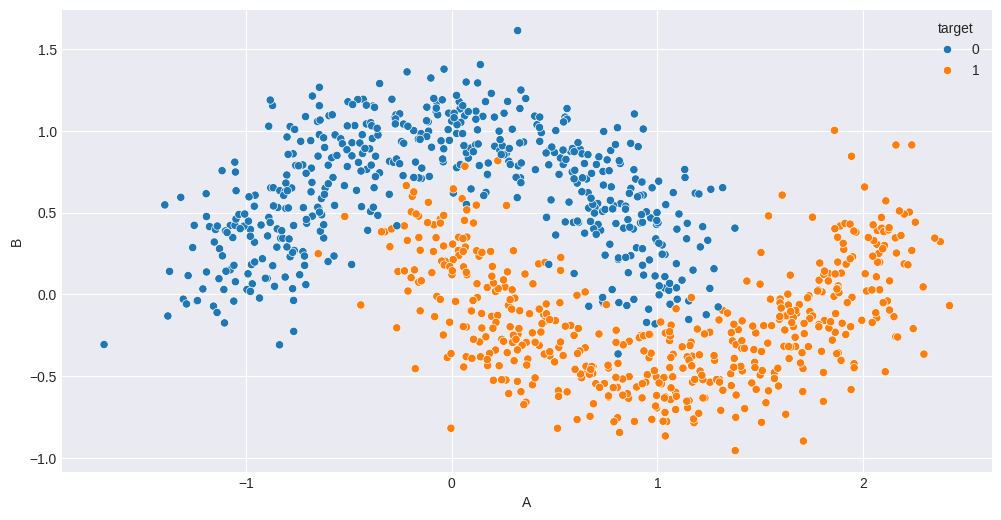

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data= data_df, x = 'A', y ='B', hue='target', ax = ax)

In [ ]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [ ]:
def sigmoid_func(Z):
    sigmoid_val = 1 /(1 + np.exp(-Z))
    return sigmoid_val

In [ ]:
def predict(row, wgts):      # Just traversing the equation of Z
    # Calculate Z value
    z = wgts[0]     #picking w0 which is bias in our equation

    for i in range(len(row)-1):
        z += wgts[i+1]*row[i]   # Z = w0 + x1.w1 + x2.w2

    return sigmoid_func(z)

In [ ]:
# Testing prediction Function
weights = np.array([0.1,2.0,1.0])      # we are giving three values as w0, w1, w2

predict(data_df.loc[0].values, weights)   # Sending one row which is having the three columns as x1, x2 and target

0.9434999754763397

**Split Manually**

In [ ]:
# Manually performing train test Split

data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]  # converting the df in numpy array and then spliting it
display(data_train.shape)            # same as print function
type(data_train)

(900, 3)

numpy.ndarray

**For Demo Purpose**

In [ ]:
# rng = np.random.default_rng(seed = RANDOM_STATE)    # Just created random numbers

# weights = rng.random(data_train.shape[1])
# weights       # Always gives the same output

In [ ]:
# weights = rng.random(data_train.shape[1])

# weights         # Every time gives different values of weights

In [ ]:
rng = np.random.default_rng(seed = RANDOM_STATE)    # Just created random numbers generator

def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(train.shape[1])       # Randomly generated weights
    m = train.shape[0]                              # number of samples or rows

    for epoch in range(n_epoch):
        sum_error = 0.0         # To calculate the total error in each of the epoch
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1]       # y_pred - y_test  (a-y)
            # sum_error += (prediction - row[-1])**2     # Squared Error
            sum_error += -row[-1]*np.log(prediction)
            weights[0] += -alpha * dz/m     # Ajusting the error using alpha , which is called as Learning Rate

            for i in range(len(row)-1):
                weights[i+1] += -alpha * row[i] * dz / m        #w1 = w1 - alpha.x1(a-y)/m     from notes...

        errors.append(sum_error/m)

    return errors, weights

In [ ]:
errors , weights = train_weights(data_train, ALPHA, EPOCHS)
len(errors)

2000

In [ ]:
weights

array([ 0.45061204,  1.1780861 , -4.36266389])

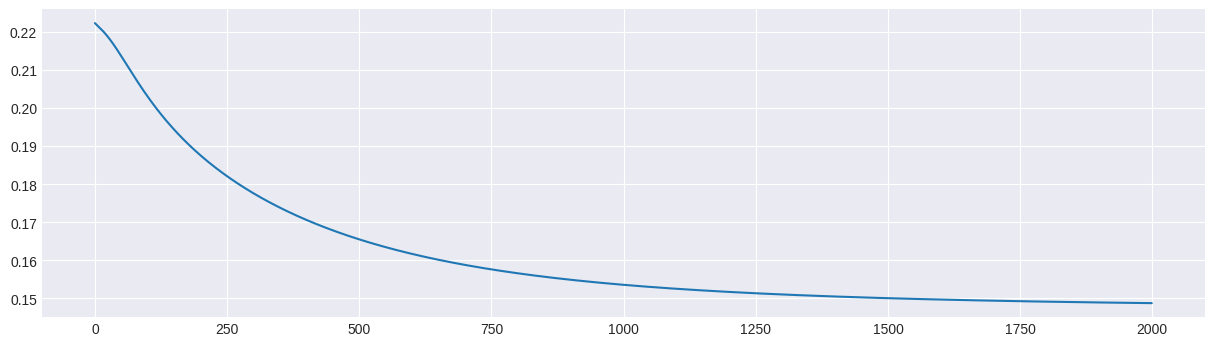

In [ ]:
# ploting the errors
fig, ax = plt.subplots()
ax.plot(errors)
plt.show()

In [ ]:
# for finding the decision boundary
def fn_plot_decision_boundary(wts, X):
    fig , ax = plt.subplots(figsize = (8,5))
    dm = 0.001      # Spacing of the grid

    # Min and Max along two axis
    x_min , x_max = X[:,0].min(), X[:,0].max()
    y_min , y_max = X[:,1].min(), X[:,1].max()

    # Generate a Mesh Grid
    xx ,yy = np.meshgrid(np.arange(x_min , x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack([XX, np.ones((XX.shape[0],1))])

    y_pred = []

    for row in XX:
        a = predict(row, weights)
        y_p = 0
        if a>=0.5:
            y_p = 1
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)    # Fills the background color of the plot
    ax.scatter(X[:,0], X[:,1],c = X[:,2], edgecolor='k', cmap = CMAP)



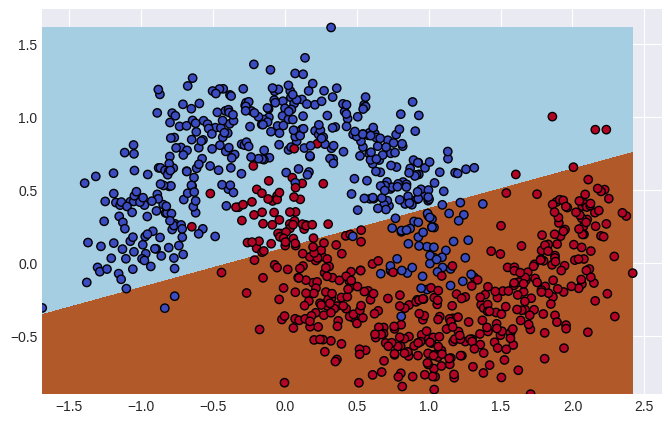

In [ ]:
fn_plot_decision_boundary(weights, data_train)



1.   EDA
2.   Attach - Sigmoid
3.   Accuracies
4.   Confusion Matrix for Train and Test



In [ ]:
# ACCURACY SCORE AND CONFUSION MATRIX


Accuaracy Score :  0.8655555555555555
Confusion Matrix :  [[385  57]
 [ 64 394]]


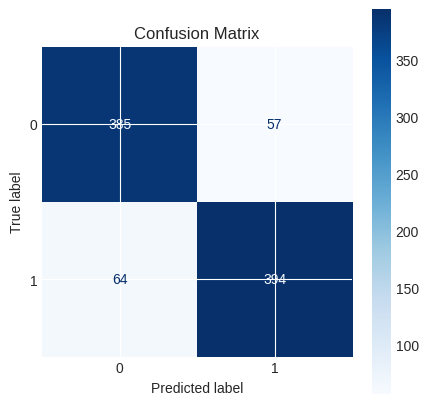

In [ ]:
preds = []

for row in data_train:
    a = predict(row, weights)
    y_pred = 0
    if a>=0.5:
        y_pred = 1
    preds.append(y_pred)

# Accuracy Score
accuracy = accuracy_score(data_train[:,-1], preds)
print("Accuaracy Score : ", accuracy)
# Confustion Matrix
cm = confusion_matrix(data_train[:,-1], preds)
print("Confusion Matrix : ",cm)

# Displaying the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize = (5,5))
disp.plot(ax = ax, cmap = 'Blues', values_format = 'g')
disp.ax_.set_title('Confusion Matrix')
plt.show()